# Classifying Handwritten digits using Tensorflow 2.x


The **[MNIST Handwritten Digit Classification Dataset](http://yann.lecun.com/exdb/mnist/)** consists of 60,000 training images and 10,000 testing images of handwritten digits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

![alt text](https://i.imgur.com/Su00XUA.png)



In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

2.4.1


In [38]:
# Loading the Handwritten MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [39]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


From above we can observe that there are 60K training samples and each sample is of size (28,28) and 10K testing samples with same size

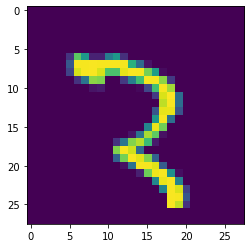

In [40]:
sample = x_train[500,:,:]
plt.imshow(sample)
plt.show()

In [41]:
print("Min value: ", sample.min())
print("Max value: ", sample.max())

Min value:  0
Max value:  255


From the above we can confirm that the each image in the dataset is in the range [0-255]

In [42]:
# Normalize the dataset between [0, 1] for the model to converge faster
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

Min value:  0.0
Max value:  1.0


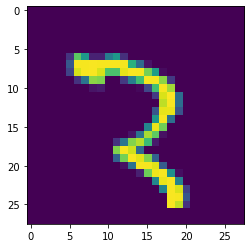

In [43]:
sample = x_train[500,:,:]

print("Min value: ", sample.min())
print("Max value: ", sample.max())

plt.imshow(sample)
plt.show()

After normalising the data, we obseve that there is no loss in data and is normalised between [0, 1] range.

In [44]:
x_train = x_train.reshape((-1, 28 * 28))

In [45]:
x_test = x_test.reshape((-1, 28 * 28))

In [46]:
# One-hot representation of the labels.
y_train = tf.keras.utils.to_categorical(y_train, 10) 
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [47]:
tf.random.set_seed(42)

In [48]:
from keras.models import Sequential
from keras.layers import Dropout, Dense

In [54]:
model = Sequential()

model.add(Dense(units=512, activation='sigmoid', 
                input_shape=(28 * 28, ), name="hidden_layer_1"))
model.add(Dropout(0.2))

model.add(Dense(units=1024, activation='sigmoid', 
                name="hidden_layer_2"))
model.add(Dropout(0.2))

model.add(Dense(10, name='output_layer', activation = 'softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 512)               401920    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 1024)              525312    
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                10250     
Total params: 937,482
Trainable params: 937,482
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Compiling the model with Adam optimizer and categorical cross entropy loss
# Also we are keeping a track of the accuracy of the model at each epoch
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
# Training the model. 
training = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_split=0.2) 

Epoch 1/50
375/375 [==============================] - 2s 4ms/step - loss: 1.0520 - accuracy: 0.6645 - val_loss: 0.2626 - val_accuracy: 0.9235
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2881 - accuracy: 0.9123 - val_loss: 0.2214 - val_accuracy: 0.9334
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2180 - accuracy: 0.9337 - val_loss: 0.1678 - val_accuracy: 0.9509
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.1619 - accuracy: 0.9517 - val_loss: 0.1363 - val_accuracy: 0.9592
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.1337 - accuracy: 0.9589 - val_loss: 0.1222 - val_accuracy: 0.9638
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.1084 - accuracy: 0.9663 - val_loss: 0.1032 - val_accuracy: 0.9703
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 0.0914 - accuracy: 0.9730 - val_loss: 0.0986 - val_accuracy: 0.9712
Epoch 

In [57]:
# evaluate the model (trained with sigmoid activation at the hidden layer)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1013 - accuracy: 0.9833
Test accuracy: 0.983299970626831


From the above model architecture we got 98.32% accuracy on the test dataset

In [53]:
# evaluate the model (trained with relu activation at the hidden layer)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1124 - accuracy: 0.9835
Test accuracy: 0.9835000038146973


Using relu activation at the hidden layers, we got 98.35 % accuracy on the test dataset